In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [19]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [20]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [21]:
EXPERIMENT_NAME = 'stress_testing_with_cols_outliers'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'COMPAS'
EXPERIMENT_SESSION_UUID = '4850ff61-3270-4584-9e71-e6c07ea03a6a'
SENSITIVE_ATTRS = ['sex', 'race', 'sex&race']
PREPROCESSING_TECHNIQUES = ['No']

In [22]:
# MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
#                'XGBClassifier', 'KNeighborsClassifier']
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression']

In [23]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [24]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [25]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(64, 25)

In [26]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,0,OK,2023-05-02 11:09:12.219,...,100,100,"[1, 2, 3]",0.721591,0.718266,0.726829,0.713755,0.723404,0.718970,0.732673
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,1,OK,2023-05-02 11:09:12.228,...,100,100,"[1, 2, 3]",0.712121,0.715170,0.707317,0.710037,0.702128,0.709602,0.722772
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,2,OK,2023-05-02 11:09:12.240,...,100,100,"[1, 2, 3]",0.700758,0.696594,0.707317,0.687732,0.702128,0.695550,0.722772
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,3,OK,2023-05-02 11:09:12.253,...,100,100,"[1, 2, 3]",0.702652,0.702786,0.702439,0.695167,0.702128,0.697892,0.722772
8,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,0,OK,2023-05-02 11:09:12.219,...,100,100,"[1, 2, 3]",0.301476,0.336011,0.247060,0.000000,0.000000,0.311418,0.259441
9,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,1,OK,2023-05-02 11:09:12.228,...,100,100,"[1, 2, 3]",0.318971,0.347595,0.273872,0.000000,0.000000,0.329722,0.273520
10,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,2,OK,2023-05-02 11:09:12.240,...,100,100,"[1, 2, 3]",0.325372,0.352949,0.281922,0.000000,0.000000,0.331955,0.297543
11,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,3,OK,2023-05-02 11:09:12.253,...,100,100,"[1, 2, 3]",0.327039,0.337838,0.310023,0.000000,0.000000,0.330004,0.314501
16,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,0,OK,2023-05-02 11:09:12.219,...,100,100,"[1, 2, 3]",0.691824,0.736232,0.575758,0.750809,0.518519,0.710145,0.571429
17,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,1,OK,2023-05-02 11:09:12.228,...,100,100,"[1, 2, 3]",0.687243,0.737143,0.558824,0.751592,0.500000,0.706161,0.562500


In [27]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [28]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

## Metrics Visualization and Reporting

In [29]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

### Subgroup metrics per dataset, experiment iteration, and model

In [30]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance',
                                                mode='max_num_columns')

alt.VConcatChart(...)

In [31]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error',
                                                mode='max_num_columns')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [32]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance',
                                             mode='max_num_columns')

alt.VConcatChart(...)

In [33]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness',
                                             mode='max_num_columns')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [34]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

In [35]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Label_Stability',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

In [36]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

In [37]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Accuracy',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [38]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric=visualizer.all_group_variance_metrics_lst[1],
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES,
                                                       mode='max_num_columns')

alt.VConcatChart(...)

In [39]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES,
                                                       mode='max_num_columns')

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [40]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter',
                                                                            model_name=MODEL_NAMES[0],
                                                                            mode='max_num_columns')

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

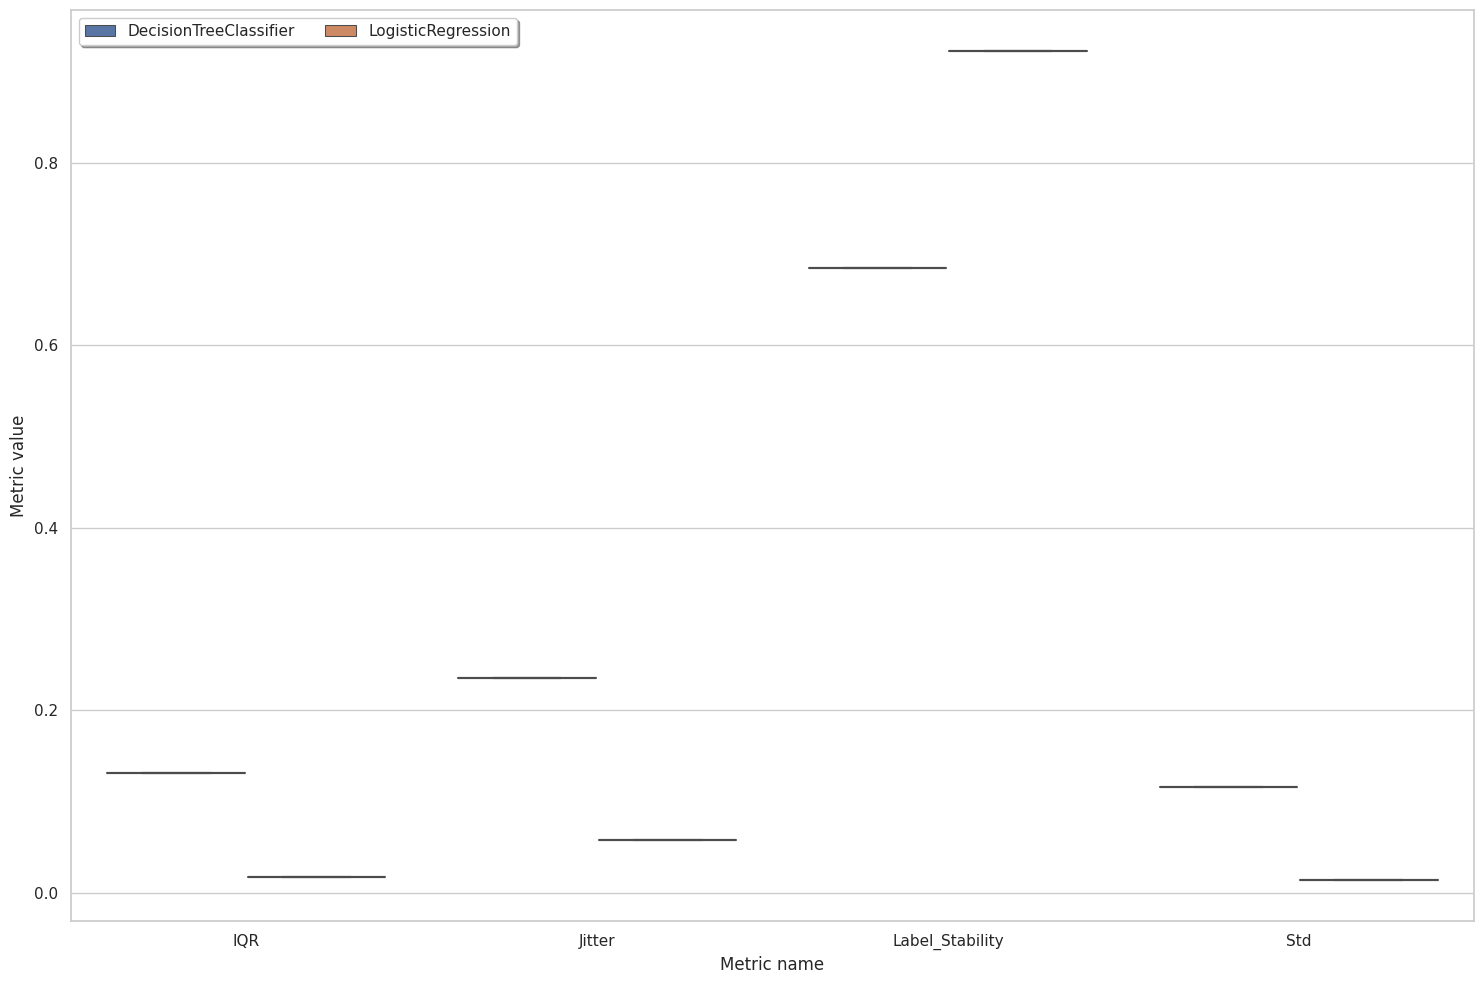

In [41]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

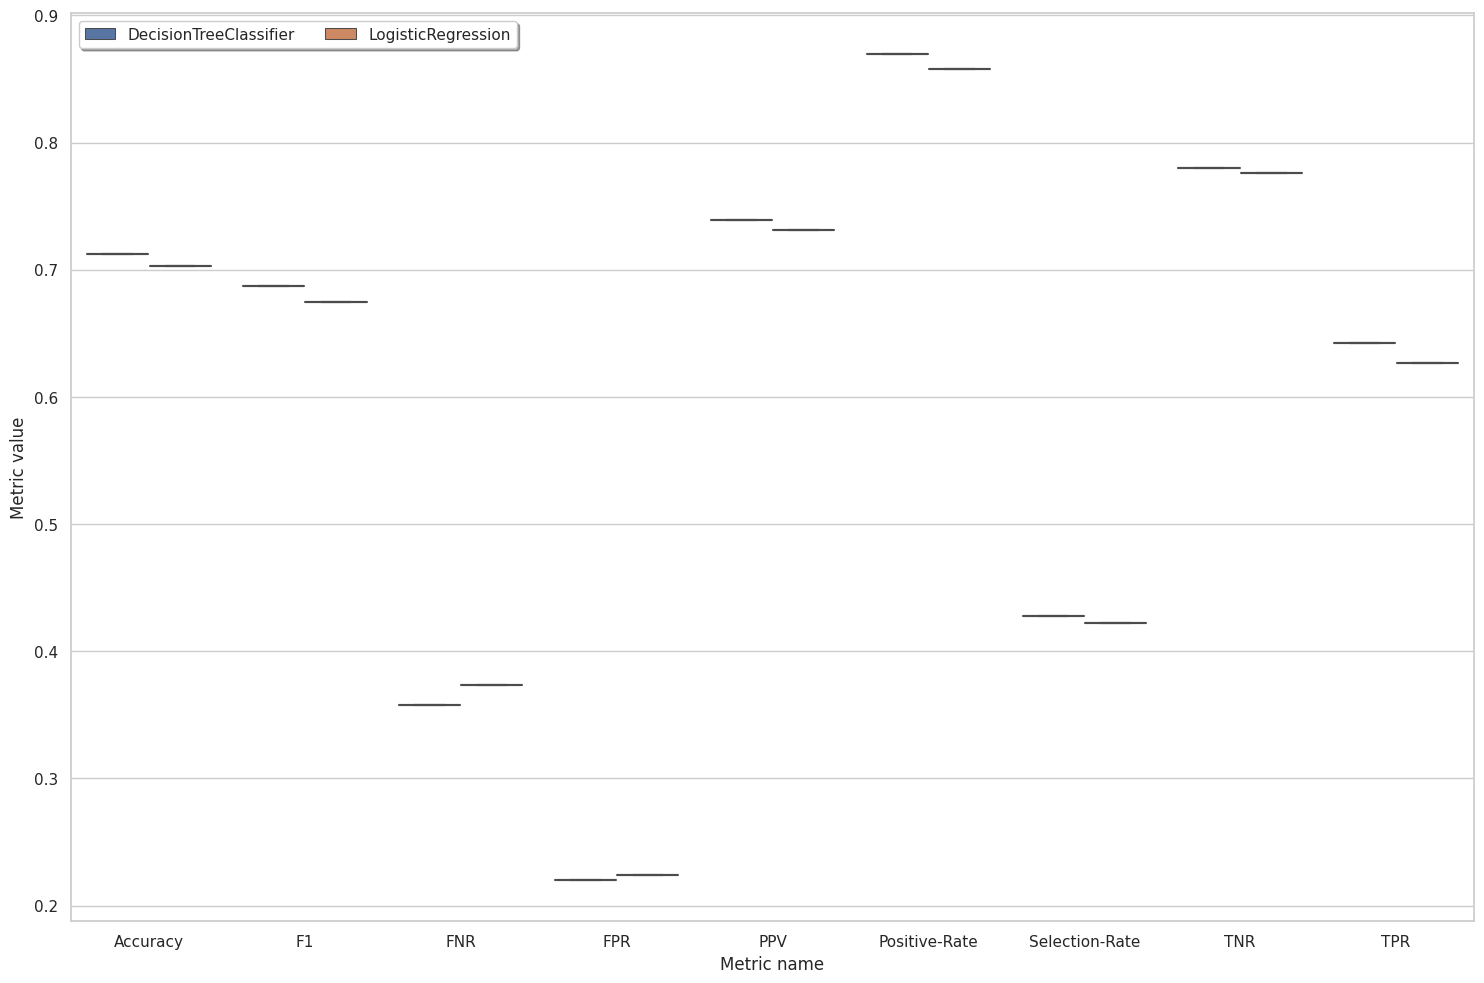

In [42]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

### Box plots for subgroup metrics per model and error level

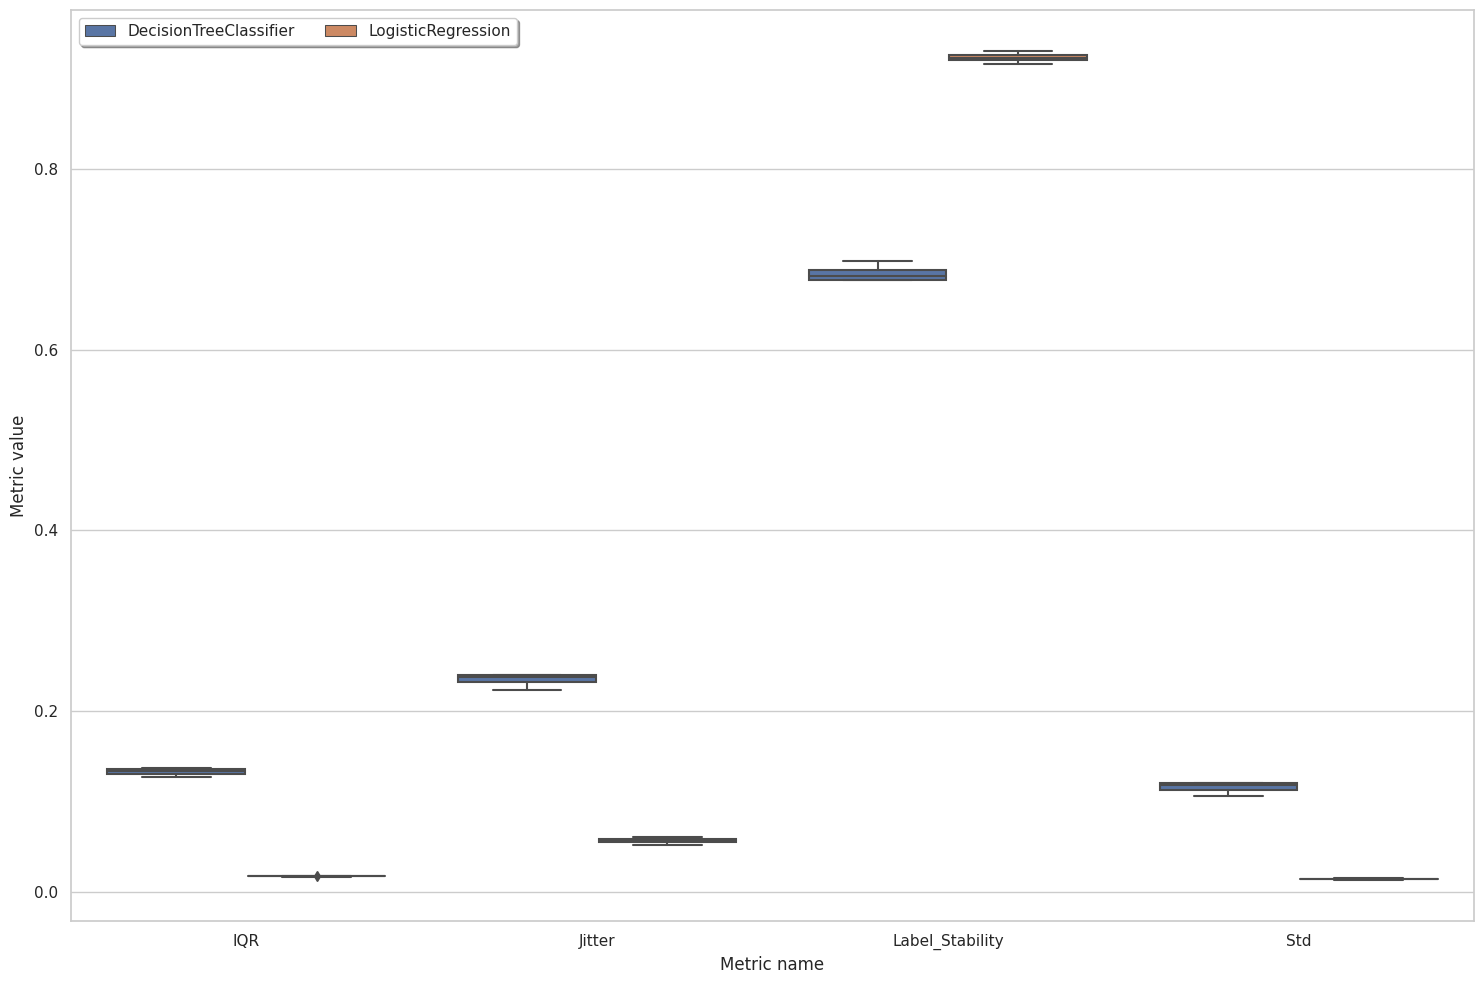

In [43]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

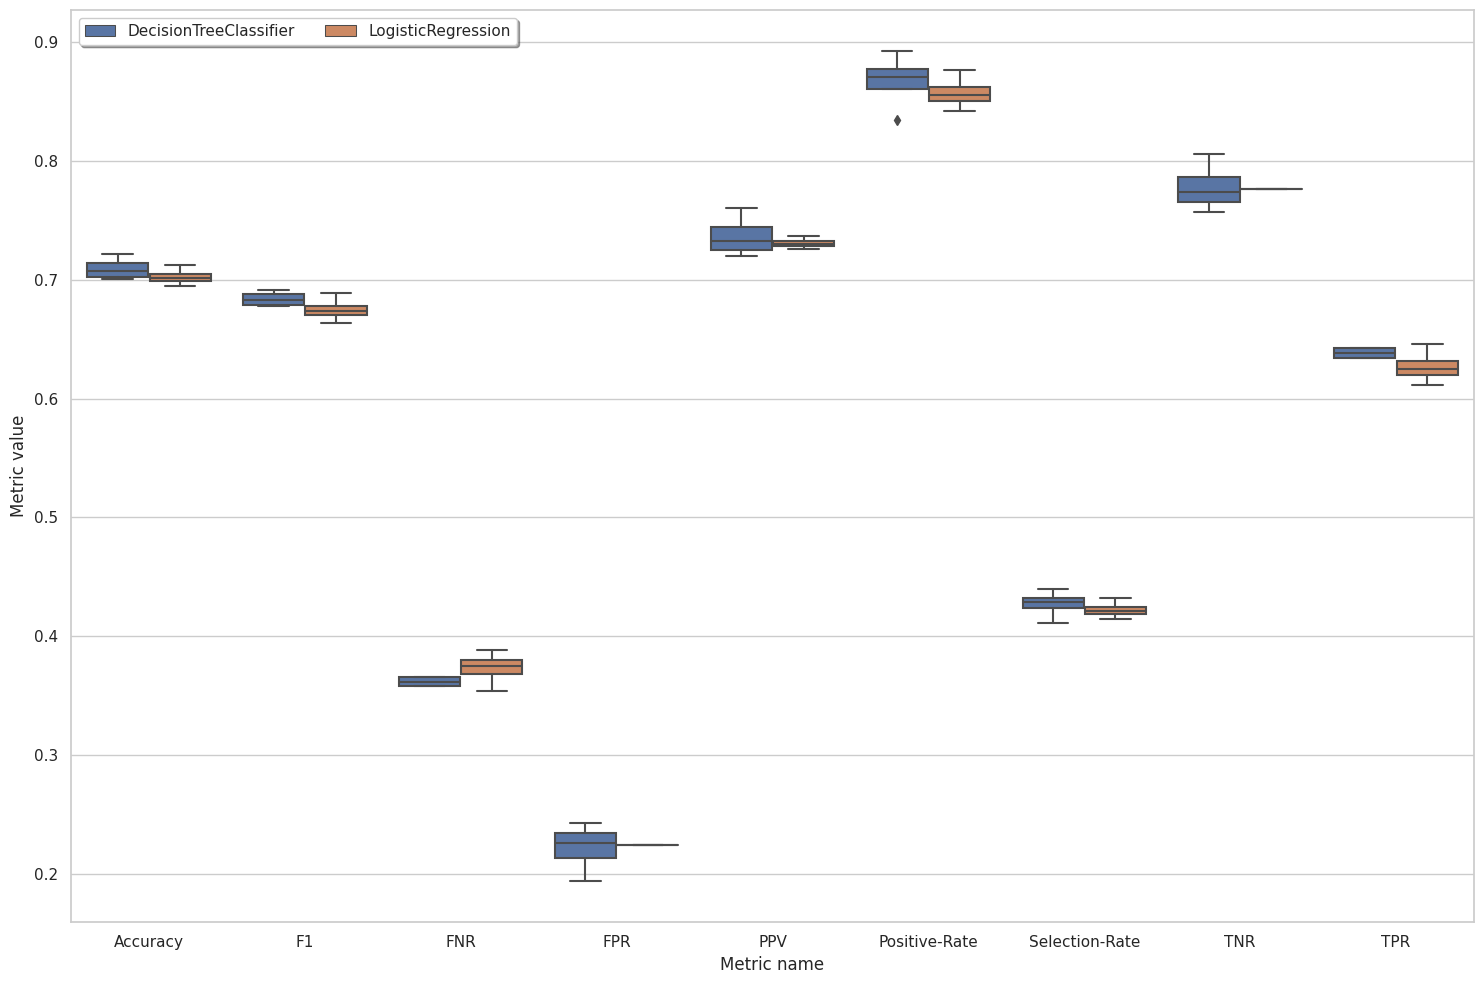

In [44]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')

### Box plots for group metrics per model and error level

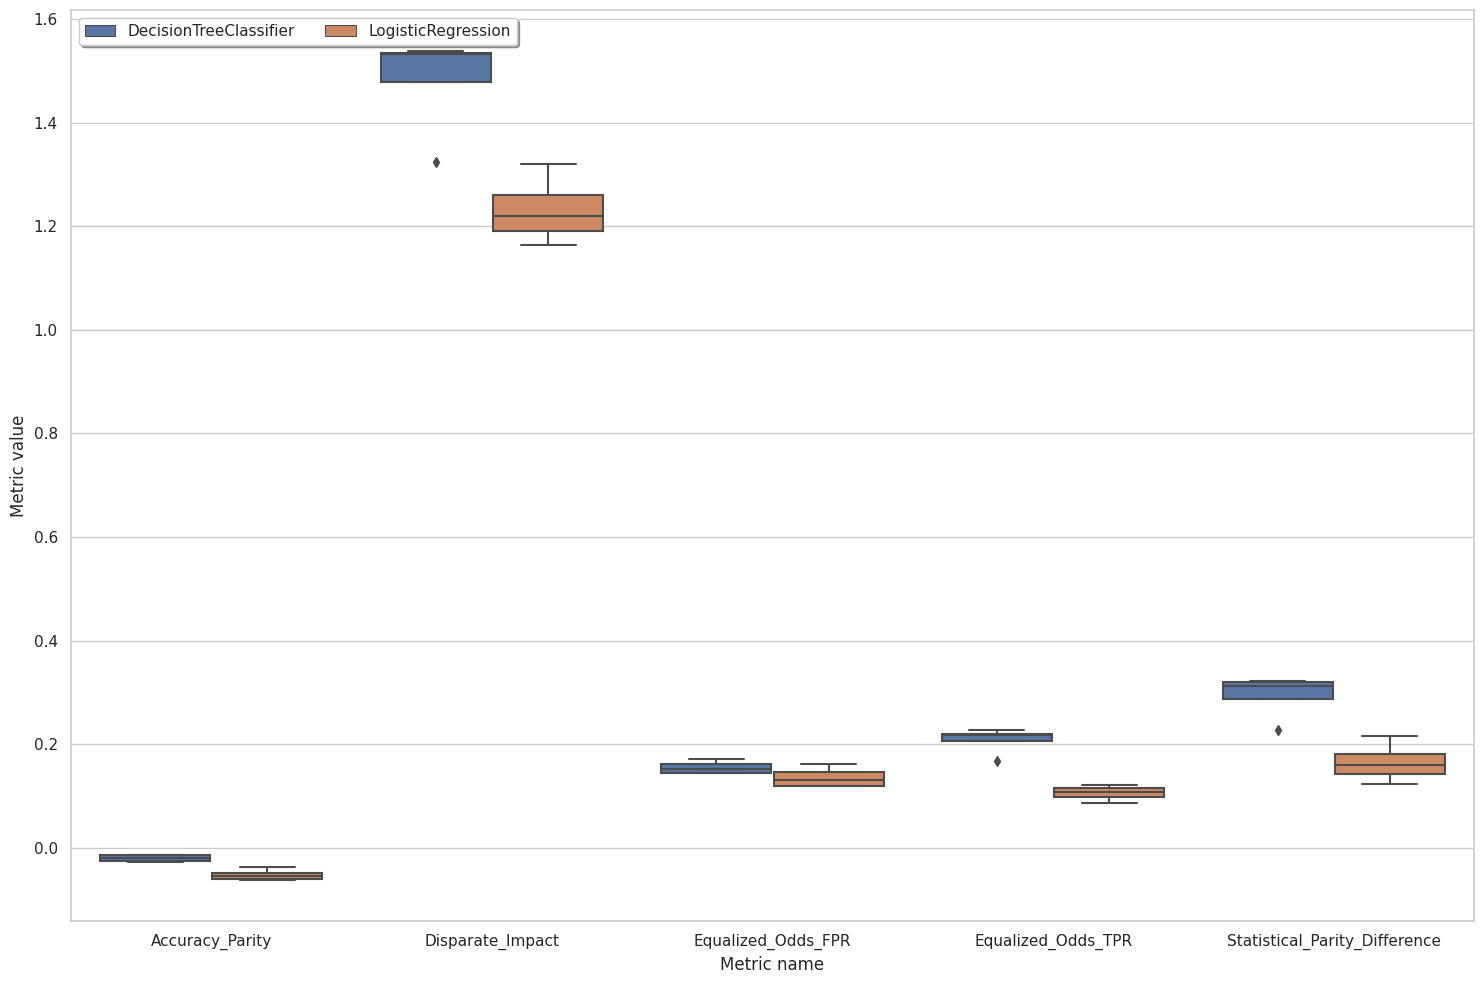

In [45]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='sex',
                                                                  group_metrics_type='fairness')

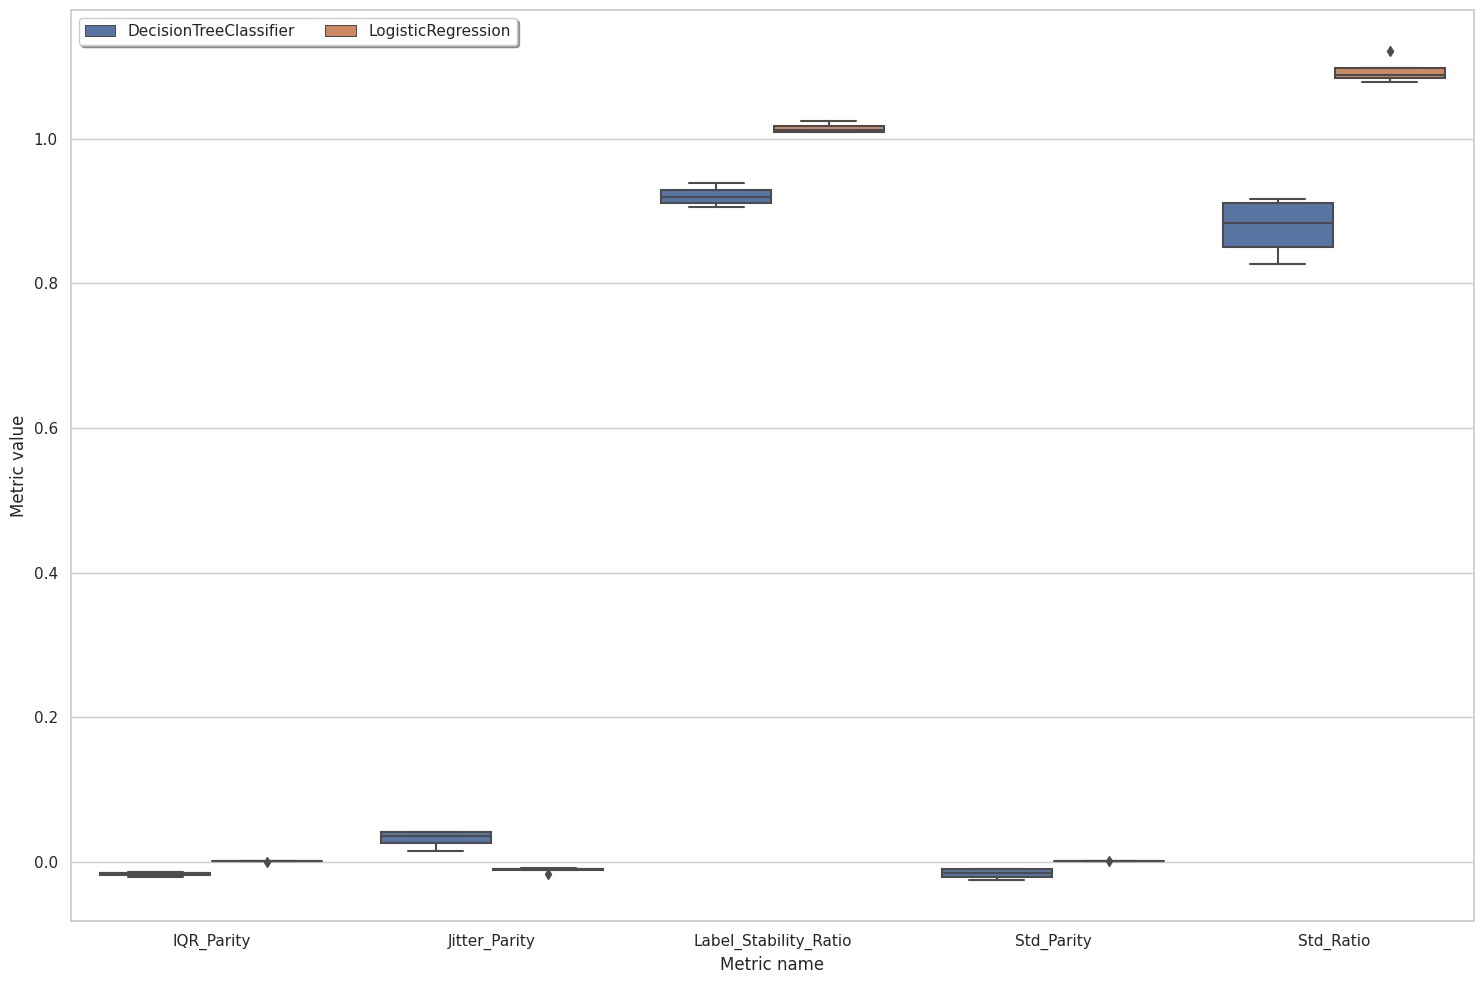

In [46]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='sex',
                                                                  group_metrics_type='variance')

### One box plot for both error and variance metrics for subgroups

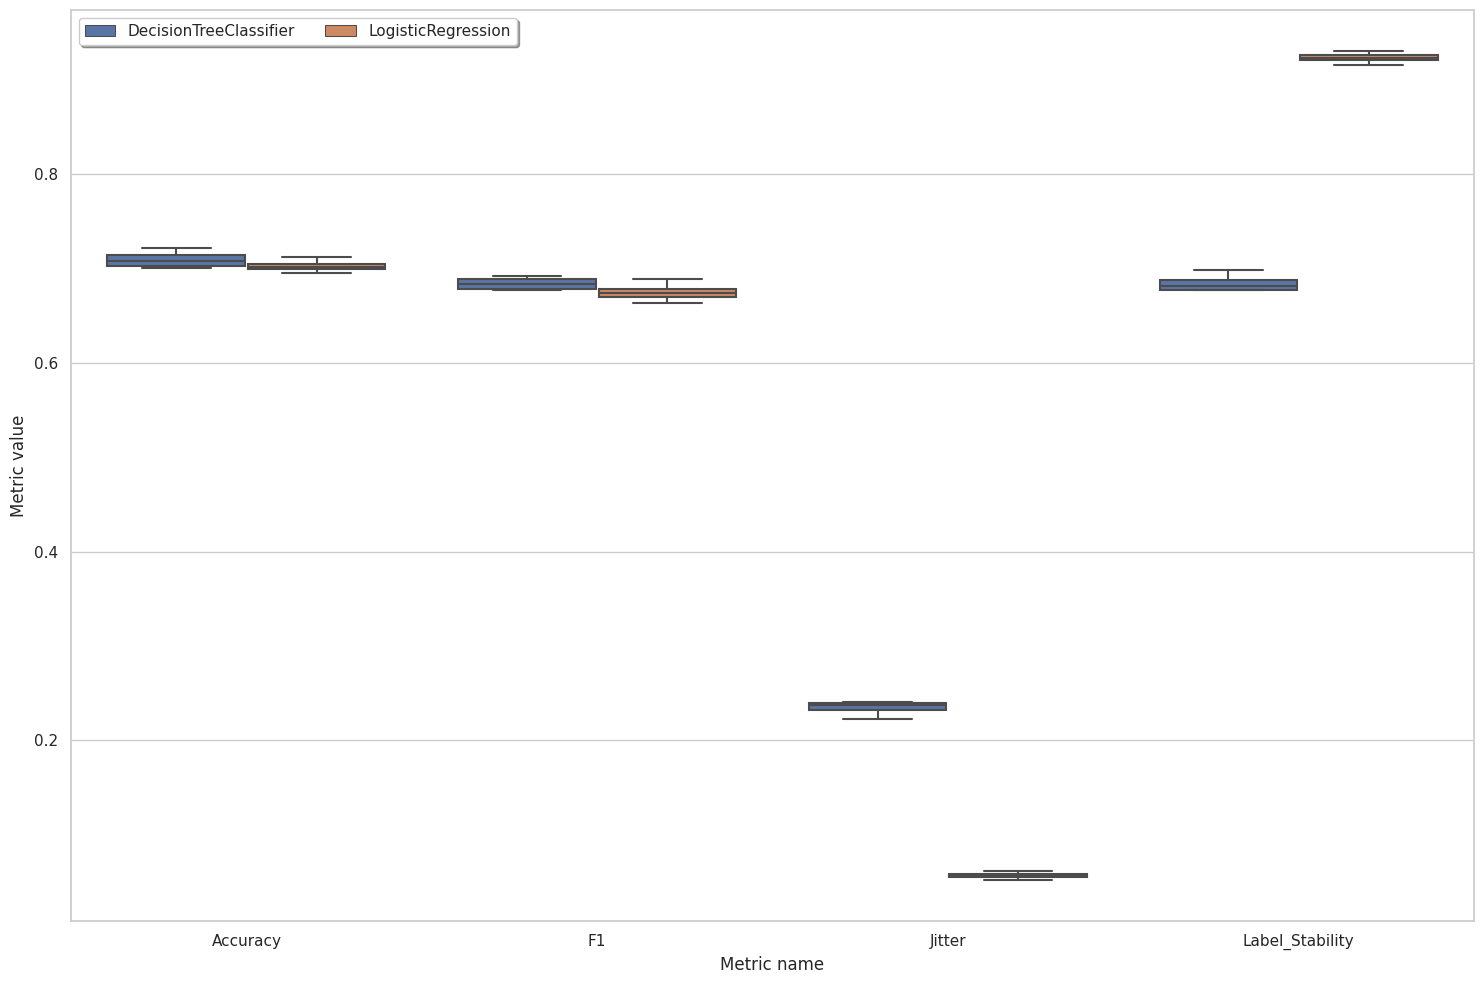

In [47]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics=['F1', 'Accuracy', 'Jitter', 'Label_Stability'])